# Laboratorio: Aplicación de operaciones elementales
**Nombre:** José Miguel Pereira Pontón

**Objetivos**

El objetivo de este laboratorio es familiarizarnos con las técnicas y herramientas de procesado de imagen. Tras realizar este laboratorio serás capaz de mejorar una imagen mediante la aplicación de técnicas básicas de preprocesado.

**Contenido**

1. Librerías
2. Importación de las imágenes
3. Corrección Gamma
4. Ecualización por Histograma

In [1]:
# En caso de necesitar instalar las librerías, descomentar las líneas de comando!
#pip install opencv-python
#pip install numpy
#pip install matplotlib
#pip install imhist

In [2]:
# Importación de las liberías
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import os
#from imhist import imhist, imcdf
%matplotlib inline  

In [3]:
# Importar la imagen
img = cv2.imread("Tratamiento-del-paisaje.jpg", cv2.IMREAD_COLOR)

In [4]:
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

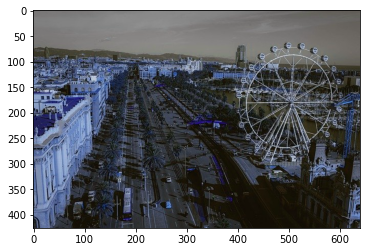

In [5]:
plt.imshow(img,)
plt.show()

Cuando se importa la imagen mediante OpenCV, se la extrae en formato BGR, para la imagen con Matplotlib, la convertimos RGB en primera instancia.

In [6]:
# Definición de función para convertir de BGR a RGB
def printRGB(image):
    image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image2,)
    plt.show() 

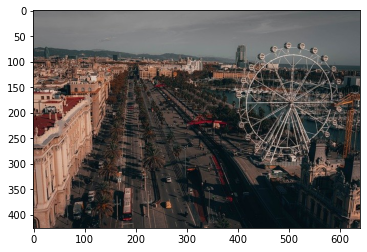

In [7]:
# Imprimir la imagen original en RGB
printRGB(img)

# Ecuación de la correción Gamma

$$\color{blue}{O=(\frac{I}{255})^{1/\gamma}}$$

*I:* Pixel de entrada [0,255]

*O:* Pixel de salida [0,255]

*${\gamma}$:* Control del brillo de la imagen.


Vamos a crear la función para el ajuste gamma

In [8]:
# Función para la corrección gamma de la imagen
def adjust_gamma(image, gamma=1.0): # Valor de gamma por default 1
    # Creación de una tabla de busqueda para el mapeo de los valores de
    # pixel entre [0,255] al valor de gamma creado
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    # Aplicacion de la corrección gamma 
    return cv2.LUT(image, table)

In [9]:
# Función para mostrar juntas las dos imágenes 
def printOriginalTranformed(image, gamma):
    image1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    adjusted = adjust_gamma(image, gamma=gamma)
    adjusted = cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)
    
    plt.subplots(figsize=(30, 15))
    plt.subplot(221)
    plt.imshow(image1)
    plt.title('Original')
    plt.subplot(222)
    plt.imshow(adjusted)
    titulo = 'Imagen con Corrección Gamma: ' + str(gamma)
    plt.title(titulo)   

## Casos:

1. $\gamma = 1$ 

In [10]:
def histograma(image, version):
    color = ('b','g','r')
    for channel,col in enumerate(color):
        histr = cv2.calcHist([image],[channel],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    titulo = 'Histograma de la imagen ' + version
    plt.title(titulo)
    plt.show()

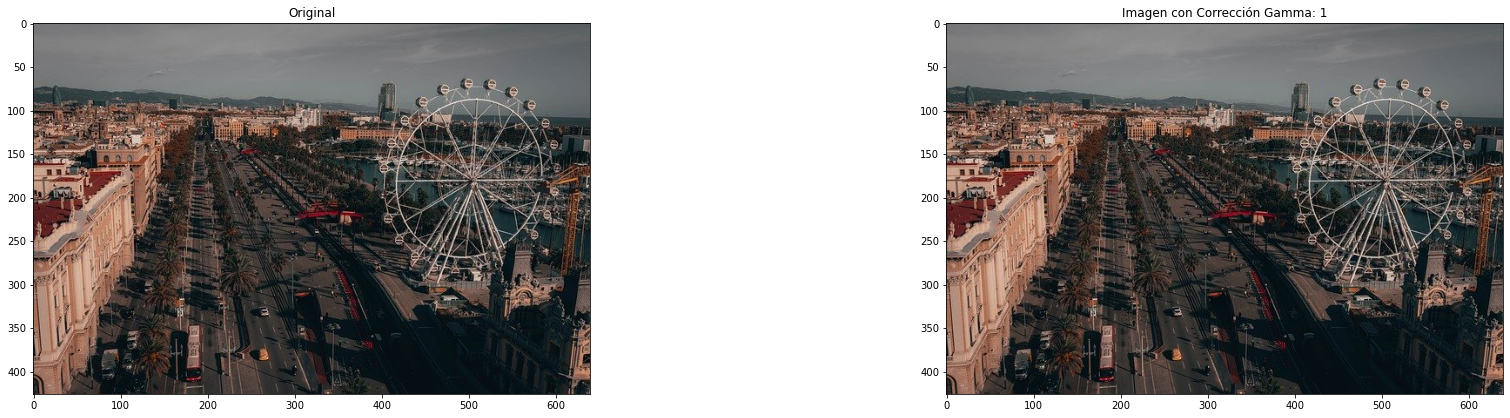

In [11]:
gamma = 1;

printOriginalTranformed(img, gamma = gamma)

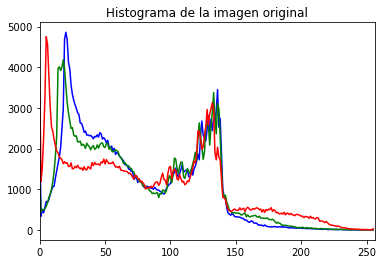

In [12]:
histograma(img, 'original')

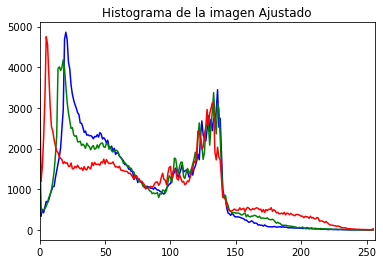

In [13]:
histograma(adjust_gamma(img,gamma), 'Ajustado')

2. $\gamma = 0.5$ 

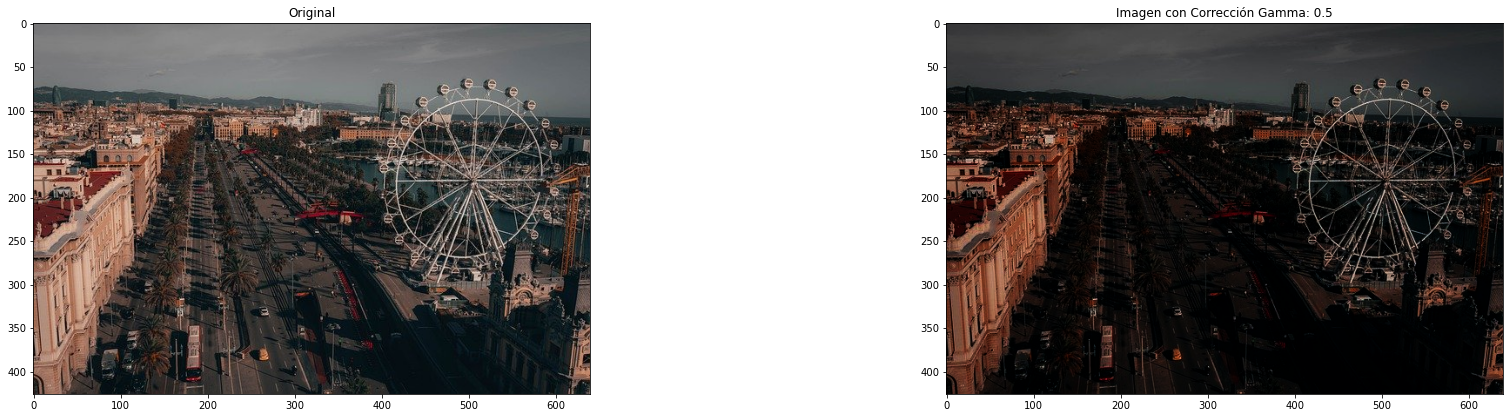

In [14]:
gamma = 0.5;

printOriginalTranformed(img, gamma = gamma)

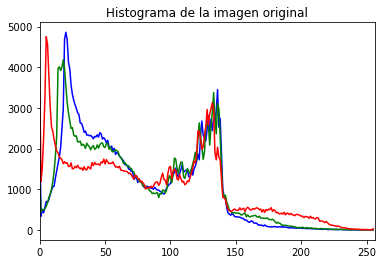

In [15]:
histograma(img, 'original')

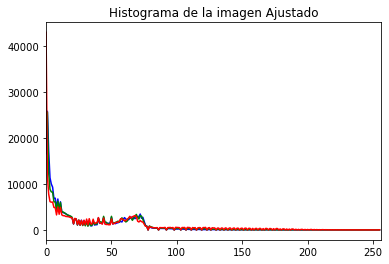

In [16]:
histograma(adjust_gamma(img,gamma), 'Ajustado')

3. $\gamma = 2$ 

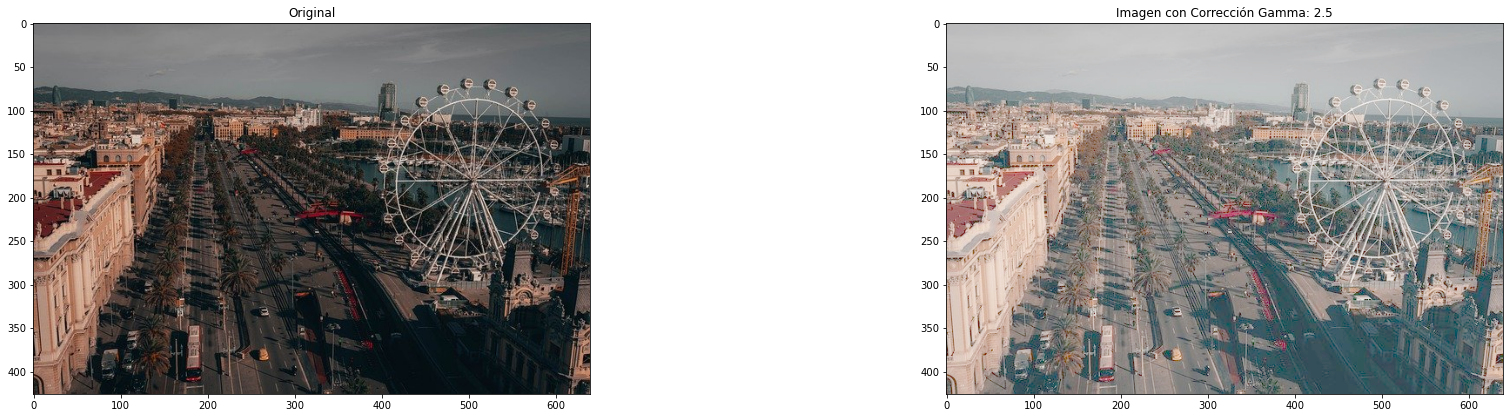

In [17]:
gamma = 2.5;

printOriginalTranformed(img, gamma = gamma)

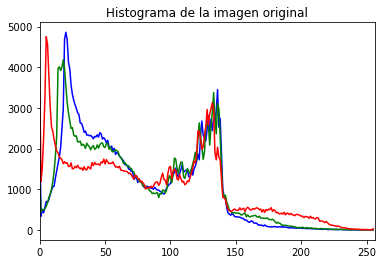

In [18]:
histograma(img, 'original')

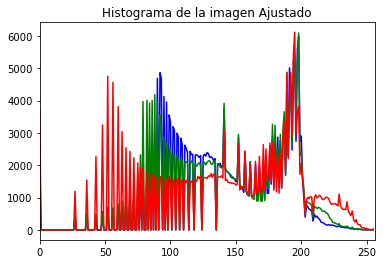

In [19]:
histograma(adjust_gamma(img,gamma), 'Ajustado')

Se logra apreciar que con un gamma < 1, se logra tener una imagen más oscura que la original, en el histograma se logra apreciar este efecto, debido a que se tiene una comprensión de cuanto a los valores cercanos a 0 (Negro).

Cuando se realiza la corrección mediante un gamma > 1, el histograma se logra ver expandido, si bien, antes se tiene una fuerte presencia de colores oscuros, ya se tiene una mayor variedad de tonos claros. Este efecto se lo logra apreciar en las tonalidades de la imagen.

In [20]:
def ecualizadorRGB(imagen):
    # Separar cada uno de los canales, recordando que la imagen está en formato BGR
    b,g,r = cv2.split(imagen)
    hist_b, bin_b = np.histogram(b.flatten(), 256, [0, 256])
    hist_g, bin_g = np.histogram(g.flatten(), 256, [0, 256])
    hist_r, bin_r = np.histogram(r.flatten(), 256, [0, 256])
    
    # Calcular la Funcion de Distribución Acumulada: Cumulative distribution function (cdf)    
    cdf_b = np.cumsum(hist_b)  
    cdf_g = np.cumsum(hist_g)
    cdf_r = np.cumsum(hist_r)
    
    # Generar una máscara del tamaño de los pixeles, iniciada en 0 y reemplazado con la media
    # Realizado para el canal azul
    cdf_mask_b = np.ma.masked_equal(cdf_b,0)
    cdf_mask_b = (cdf_mask_b - cdf_mask_b.min())*255/(cdf_mask_b.max()-cdf_mask_b.min())
    cdf_final_b = np.ma.filled(cdf_mask_b,0).astype('uint8')
    
    # Realizado para el canal verde 
    cdf_mask_g = np.ma.masked_equal(cdf_g,0)
    cdf_mask_g = (cdf_mask_g - cdf_mask_g.min())*255/(cdf_mask_g.max()-cdf_mask_g.min())
    cdf_final_g = np.ma.filled(cdf_mask_g,0).astype('uint8')
    
    # Realizado para el canal rojo
    cdf_mask_r = np.ma.masked_equal(cdf_r,0)
    cdf_mask_r = (cdf_mask_r - cdf_mask_r.min())*255/(cdf_mask_r.max()-cdf_mask_r.min())
    cdf_final_r = np.ma.filled(cdf_mask_r,0).astype('uint8')
    
    # uniendo las imagenes en los canales b,g,r
    img_b = cdf_final_b[b]
    img_g = cdf_final_g[g]
    img_r = cdf_final_r[r]
    img_out = cv2.merge((img_b, img_g, img_r))
    
    return img_out

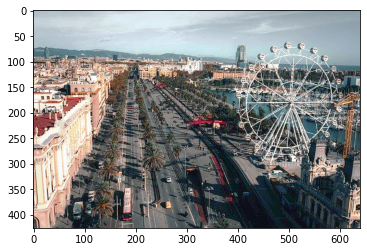

In [21]:
img_eq = ecualizadorRGB(adjust_gamma(img,gamma))
printRGB(img_eq)

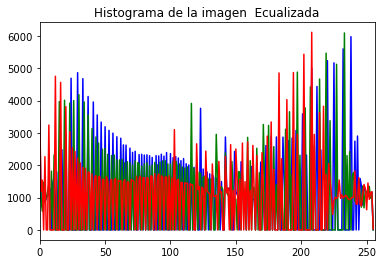

In [22]:
histograma(img_eq, ' Ecualizada')

In [23]:
# Guardado de las imágenes 
#cv2.imwrite('imagenEcualizadaGamma.jpg', img_eq)
#cv2.imwrite('imagenGamma.jpg', adjust_gamma(img,gamma))

Se logra apreciar que se obtuvo un mejor contraste en la foto tras haber aplicado una ecualización por histograma después de una corrección gamma.
En el histograma se logra apreciar una mejor distribución en cuanto las tonalidades

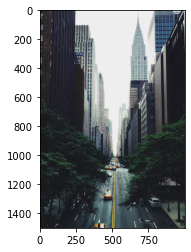

In [24]:
imagen2 = cv2.imread("imagen2.jpg", cv2.IMREAD_COLOR)
printRGB(imagen2)

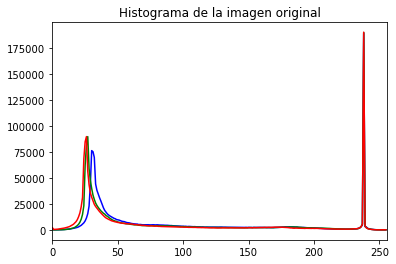

In [25]:
histograma(imagen2, 'original')

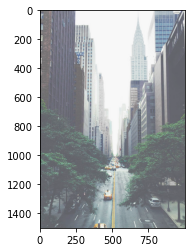

In [26]:
# ajustar mediante corrección gamma, con gamma = 2.5 
imagen2_gamma = adjust_gamma(imagen2,gamma)
printRGB(imagen2_gamma)

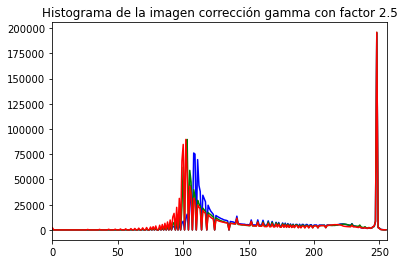

In [27]:
histograma(imagen2_gamma, 'corrección gamma con factor 2.5')

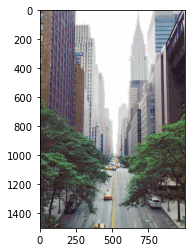

In [28]:
imagen2_eq = ecualizadorRGB(imagen2_gamma)
printRGB(imagen2_eq)

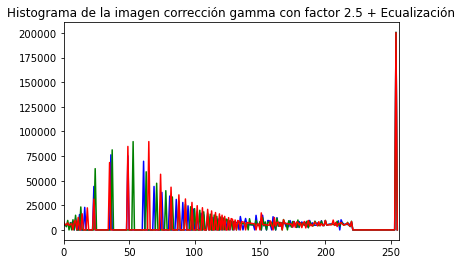

In [29]:
histograma(imagen2_eq, 'corrección gamma con factor 2.5 + Ecualización')

In [30]:
# Guardado de las imágenes 
#cv2.imwrite('imagenEcualizada2Gamma.jpg', imagen2_eq)
#cv2.imwrite('imagenGamma2.jpg', imagen2_gamma)